In [4]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

#import raw dataset
df = pd.read_csv("/Users/maurits/Documents/Ironhack/week_03/GPW3/ironhack_gpw3/data/combined_dataset_allyears.csv")
df.head(10)

,City Boundary Specification (LAU/grid),Country Or Territory,City,City Code,Total City Population *,Year,Air Pollutant,Health Risk Scenario,Populated Area [km2],Air Pollution Average [ug/m3],Air Pollution Population Weighted Average [ug/m3],Premature Deaths,Premature Deaths - lower CI,Premature Deaths - upper CI,Years Of Life Lost,Years Of Life Lost - lower CI,Years Of Life Lost - upper CI
0,Urban Centres (grid),Austria,All Urban Centres in a Country,NaN,2405646,2005,NO2,WHO_2005_HRAPIE_Scen_Base,446,30.3,32.8,1352.0,783.0,1911.0,14704.0,8522.0,20791.0
1,Urban Centres (grid),Belgium,All Urban Centres in a Country,NaN,3030639,2005,NO2,WHO_2005_HRAPIE_Scen_Base,745,32.4,35.1,2141.0,1247.0,3017.0,22939.0,13338.0,32327.0
2,Urban Centres (grid),Bulgaria,All Urban Centres in a Country,NaN,3010927,2005,NO2,WHO_2005_HRAPIE_Scen_Base,384,23.3,24.9,1236.0,712.0,1759.0,13367.0,7713.0,18982.0
3,Urban Centres (grid),Cyprus,All Urban Centres in a Country,NaN,418267,2005,NO2,WHO_2005_HRAPIE_Scen_Base,131,20.3,21.0,24.0,13.0,34.0,249.0,143.0,357.0
4,Urban Centres (grid),Czechia,All Urban Centres in a Country,NaN,2464143,2005,NO2,WHO_2005_HRAPIE_Scen_Base,536,26.4,27.6,961.0,554.0,1364.0,10585.0,6105.0,15045.0
5,Urban Centres (grid),Germany,All Urban Centres in a Country,NaN,25479567,2005,NO2,WHO_2005_HRAPIE_Scen_Base,6769,29.2,30.7,13555.0,7850.0,19178.0,152916.0,88550.0,216447.0
6,Urban Centres (grid),Denmark,All Urban Centres in a Country,NaN,1490619,2005,NO2,WHO_2005_HRAPIE_Scen_Base,400,22.5,24.1,341.0,197.0,487.0,3757.0,2159.0,5354.0
7,Urban Centres (grid),Estonia,All Urban Centres in a Country,NaN,522560,2005,NO2,WHO_2005_HRAPIE_Scen_Base,103,16.4,17.4,5.0,3.0,7.0,54.0,31.0,78.0
8,Urban Centres (grid),Spain,All Urban Centres in a Country,NaN,21279144,2005,NO2,WHO_2005_HRAPIE_Scen_Base,2439,29.8,34.3,13055.0,7618.0,18337.0,143218.0,83571.0,201141.0
9,Urban Centres (grid),European Union Countries,All Urban Centres in EU27,NaN,145177261,2005,NO2,WHO_2005_HRAPIE_Scen_Base,29537,29.3,32.1,81424.0,47430.0,114554.0,907395.0,528454.0,1276934.0


In [5]:
######## PART 1: DATA CLEANING ########

# CLEANING TECHNIQUES:

# 1. concatenate datasets DONE
# 2. rename columns: replace white spaces with underscores DONE
# 3. replace null values in column premature deaths with appropriate values DONE*
# 4. remove duplicated rows (if any)
# 5. remove redundant columns
# 6. handle null values
# 7. reset index

#* might need some attention

In [6]:
# 2. lowercase column names and replace white spaces for underscores.

df.columns = [col.replace(" ","_").lower() for col in df.columns]

In [7]:
# column_names = list([df.columns])
column_names = df.columns.tolist()
column_names

['city_boundary_specification_(lau/grid)',
 'country_or_territory',
 'city',
 'city_code',
 'total_city_population_*',
 'year',
 'air_pollutant',
 'health_risk_scenario',
 'populated_area_[km2]',
 'air_pollution_average_[ug/m3]',
 'air_pollution_population_weighted_average_[ug/m3]',
 'premature_deaths',
 'premature_deaths_-_lower_ci',
 'premature_deaths_-_upper_ci',
 'years_of_life_lost',
 'years_of_life_lost_-_lower_ci',
 'years_of_life_lost_-_upper_ci']

In [8]:
column_names[-6:]

['premature_deaths',
 'premature_deaths_-_lower_ci',
 'premature_deaths_-_upper_ci',
 'years_of_life_lost',
 'years_of_life_lost_-_lower_ci',
 'years_of_life_lost_-_upper_ci']

In [9]:
columns_to_check = column_names[-6:]
rows_with_null_values = df[columns_to_check].isnull().all(axis=1)
years_countries = df.loc[rows_with_null_values, ['country_or_territory', 'year']]
print(years_countries)


years_countries.describe()

       country_or_territory  year
56                  Austria  2005
57                  Belgium  2005
58                 Bulgaria  2005
59                   Cyprus  2005
60                  Czechia  2005
...                     ...   ...
226583             Slovakia  2019
226590             Slovakia  2020
226594             Slovakia  2020
226601             Slovakia  2021
226605             Slovakia  2021

[49708 rows x 2 columns]


,year
count,49708.000000
mean,2013.000000
std,4.899029
min,2005.000000
25%,2009.000000
50%,2013.000000
75%,2017.000000
max,2021.000000


In [10]:
# Fill NaN in premature deaths with mean, sort by city and year

def fill_na_with_group_mean(group):
    return group.fillna(group.mean())

df['premature_deaths'] = df.groupby(['city', 'year'])['premature_deaths'].transform(fill_na_with_group_mean)

df['premature_deaths']
df_mean = df
df_mean['premature_deaths']

0         1352.0
1         2141.0
2         1236.0
3           24.0
4          961.0
           ...  
226605      31.0
226606      63.0
226607      22.0
226608      17.0
226609      91.0
Name: premature_deaths, Length: 226610, dtype: float64

In [11]:
# Check with an appopriate visualisation method which aggregation method is most appropriate (mean or median).

In [12]:
# Fill NaN in premature deaths with median, sort by city and year

def fill_na_with_group_median(group):
    return group.fillna(group.median())

df['years_of_life_lost'] = df.groupby(['city', 'year'])['years_of_life_lost'].transform(fill_na_with_group_median)

In [13]:
# Fill NaN in premature deaths with median, sort by city and year

def fill_na_with_group_median(group):
    return group.fillna(group.median())

df['premature_deaths'] = df.groupby(['city', 'year'])['premature_deaths'].transform(fill_na_with_group_median)

In [14]:
# Potentially use this code to fill in NaN in ci columns

def fill_na_with_group_median(group):
    return group.fillna(group.median())

df['premature_deaths_-_lower_ci'] = df.groupby(['city', 'year'])['premature_deaths_-_lower_ci'].transform(fill_na_with_group_median)

In [15]:
def fill_na_with_group_median(group):
    return group.fillna(group.median())

df['premature_deaths_-_upper_ci'] = df.groupby(['city', 'year'])['premature_deaths_-_upper_ci'].transform(fill_na_with_group_median)

In [16]:
def fill_na_with_group_median(group):
    return group.fillna(group.median())

df['years_of_life_lost_-_lower_ci'] = df.groupby(['city', 'year'])['years_of_life_lost_-_lower_ci'].transform(fill_na_with_group_median)

In [17]:
def fill_na_with_group_median(group):
    return group.fillna(group.median())

df['years_of_life_lost_-_upper_ci'] = df.groupby(['city', 'year'])['years_of_life_lost_-_upper_ci'].transform(fill_na_with_group_median)

In [18]:
df.isna().sum()

city_boundary_specification_(lau/grid)                  0
country_or_territory                                    0
city                                                    0
city_code                                            4340
total_city_population_*                                 0
year                                                    0
air_pollutant                                           0
health_risk_scenario                                    0
populated_area_[km2]                                    0
air_pollution_average_[ug/m3]                           0
air_pollution_population_weighted_average_[ug/m3]       0
premature_deaths                                        0
premature_deaths_-_lower_ci                             0
premature_deaths_-_upper_ci                             0
years_of_life_lost                                      0
years_of_life_lost_-_lower_ci                           0
years_of_life_lost_-_upper_ci                           0
dtype: int64

In [19]:
# 3. remove duplicated rows (if any). Check: there were zero duplicated rows, nothing to remove.
df.duplicated().sum()


np.int64(0)

In [20]:
# column removal: city_code

df = df.drop('city_code', axis=1)

In [21]:
# Reset the index
df = df.reset_index(drop=True)
df

,city_boundary_specification_(lau/grid),country_or_territory,city,total_city_population_*,year,air_pollutant,health_risk_scenario,populated_area_[km2],air_pollution_average_[ug/m3],air_pollution_population_weighted_average_[ug/m3],premature_deaths,premature_deaths_-_lower_ci,premature_deaths_-_upper_ci,years_of_life_lost,years_of_life_lost_-_lower_ci,years_of_life_lost_-_upper_ci
0,Urban Centres (grid),Austria,All Urban Centres in a Country,2405646,2005,NO2,WHO_2005_HRAPIE_Scen_Base,446,30.3,32.8,1352.0,783.0,1911.0,14704.0,8522.0,20791.0
1,Urban Centres (grid),Belgium,All Urban Centres in a Country,3030639,2005,NO2,WHO_2005_HRAPIE_Scen_Base,745,32.4,35.1,2141.0,1247.0,3017.0,22939.0,13338.0,32327.0
2,Urban Centres (grid),Bulgaria,All Urban Centres in a Country,3010927,2005,NO2,WHO_2005_HRAPIE_Scen_Base,384,23.3,24.9,1236.0,712.0,1759.0,13367.0,7713.0,18982.0
3,Urban Centres (grid),Cyprus,All Urban Centres in a Country,418267,2005,NO2,WHO_2005_HRAPIE_Scen_Base,131,20.3,21.0,24.0,13.0,34.0,249.0,143.0,357.0
4,Urban Centres (grid),Czechia,All Urban Centres in a Country,2464143,2005,NO2,WHO_2005_HRAPIE_Scen_Base,536,26.4,27.6,961.0,554.0,1364.0,10585.0,6105.0,15045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226605,ESTAT Urban Audit Cities (LAU),Slovakia,Trencín,62655,2021,PM10,WHO_2021_AQG_Scen_Base,64,18.8,20.1,31.0,11.0,21.0,194.0,121.0,235.0
226606,ESTAT Urban Audit Cities (LAU),Slovakia,Trencín,62655,2021,PM2.5,WHO_2021_AQG_Scen_Base,64,14.5,15.6,63.0,48.0,70.0,678.0,519.0,756.0
226607,ESTAT Urban Audit Cities (LAU),Slovakia,Trencín,62655,2021,NO2,WHO_2021_AQG_Scen_Sensitivity_2,64,10.7,14.1,22.0,11.0,43.0,238.0,121.0,466.0
226608,ESTAT Urban Audit Cities (LAU),Slovakia,Trencín,62655,2021,O3,WHO_2021_AQG_Scen_Sensitivity_2,64,19308.1,18276.6,17.0,14.0,21.0,194.0,154.0,235.0


In [22]:
# Adding a density column to the dataset
df['density'] = df['total_city_population_*']/df['populated_area_[km2]']
df.head()

,city_boundary_specification_(lau/grid),country_or_territory,city,total_city_population_*,year,air_pollutant,health_risk_scenario,populated_area_[km2],air_pollution_average_[ug/m3],air_pollution_population_weighted_average_[ug/m3],premature_deaths,premature_deaths_-_lower_ci,premature_deaths_-_upper_ci,years_of_life_lost,years_of_life_lost_-_lower_ci,years_of_life_lost_-_upper_ci,density
0,Urban Centres (grid),Austria,All Urban Centres in a Country,2405646,2005,NO2,WHO_2005_HRAPIE_Scen_Base,446,30.3,32.8,1352.0,783.0,1911.0,14704.0,8522.0,20791.0,5393.825112
1,Urban Centres (grid),Belgium,All Urban Centres in a Country,3030639,2005,NO2,WHO_2005_HRAPIE_Scen_Base,745,32.4,35.1,2141.0,1247.0,3017.0,22939.0,13338.0,32327.0,4067.971812
2,Urban Centres (grid),Bulgaria,All Urban Centres in a Country,3010927,2005,NO2,WHO_2005_HRAPIE_Scen_Base,384,23.3,24.9,1236.0,712.0,1759.0,13367.0,7713.0,18982.0,7840.955729
3,Urban Centres (grid),Cyprus,All Urban Centres in a Country,418267,2005,NO2,WHO_2005_HRAPIE_Scen_Base,131,20.3,21.0,24.0,13.0,34.0,249.0,143.0,357.0,3192.877863
4,Urban Centres (grid),Czechia,All Urban Centres in a Country,2464143,2005,NO2,WHO_2005_HRAPIE_Scen_Base,536,26.4,27.6,961.0,554.0,1364.0,10585.0,6105.0,15045.0,4597.281716


In [23]:
# Filtering on only PM 2.5 pollutants
df_filtered = df[df['air_pollutant'] == 'PM2.5'] 
df_filtered.head()

,city_boundary_specification_(lau/grid),country_or_territory,city,total_city_population_*,year,air_pollutant,health_risk_scenario,populated_area_[km2],air_pollution_average_[ug/m3],air_pollution_population_weighted_average_[ug/m3],premature_deaths,premature_deaths_-_lower_ci,premature_deaths_-_upper_ci,years_of_life_lost,years_of_life_lost_-_lower_ci,years_of_life_lost_-_upper_ci,density
84,Urban Centres (grid),Austria,All Urban Centres in a Country,2405646,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,446,21.6,22.0,2532.0,1687.0,3287.0,27563.0,18385.0,35772.0,5393.825112
85,Urban Centres (grid),Belgium,All Urban Centres in a Country,3030639,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,745,19.0,19.3,3025.0,2013.0,3936.0,32439.0,21580.0,42208.0,4067.971812
86,Urban Centres (grid),Bulgaria,All Urban Centres in a Country,3010927,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,384,34.2,34.6,7927.0,5363.0,10157.0,85612.0,57929.0,109669.0,7840.955729
87,Urban Centres (grid),Cyprus,All Urban Centres in a Country,418267,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,131,29.5,29.6,460.0,310.0,592.0,4835.0,3249.0,6231.0,3192.877863
88,Urban Centres (grid),Czechia,All Urban Centres in a Country,2464143,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,536,24.4,24.6,3330.0,2231.0,4315.0,36733.0,24581.0,47529.0,4597.281716


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226610 entries, 0 to 226609
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   city_boundary_specification_(lau/grid)             226610 non-null  object 
 1   country_or_territory                               226610 non-null  object 
 2   city                                               226610 non-null  object 
 3   total_city_population_*                            226610 non-null  int64  
 4   year                                               226610 non-null  int64  
 5   air_pollutant                                      226610 non-null  object 
 6   health_risk_scenario                               226610 non-null  object 
 7   populated_area_[km2]                               226610 non-null  int64  
 8   air_pollution_average_[ug/m3]                      226610 non-null  float6

In [25]:
# exporting dataset to CSV
# df.to_csv('cleaned_combined_dataset_density.csv', index=False)

In [26]:
#import cleaned and filtered dataset
df = pd.read_csv("/Users/maurits/Documents/Ironhack/week_03/GPW3/ironhack_gpw3/data/cleaned/cleaned_combined_dataset_filtered.csv")
df.head(10)

,city_boundary_specification_(lau/grid),country_or_territory,city,total_city_population_*,year,air_pollutant,health_risk_scenario,populated_area_[km2],air_pollution_average_[ug/m3],air_pollution_population_weighted_average_[ug/m3],premature_deaths,premature_deaths_-_lower_ci,premature_deaths_-_upper_ci,years_of_life_lost,years_of_life_lost_-_lower_ci,years_of_life_lost_-_upper_ci,density
0,Urban Centres (grid),Austria,All Urban Centres in a Country,2405646,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,446,21.6,22.0,2532.0,1687.0,3287.0,27563.0,18385.0,35772.0,5393.825112
1,Urban Centres (grid),Belgium,All Urban Centres in a Country,3030639,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,745,19.0,19.3,3025.0,2013.0,3936.0,32439.0,21580.0,42208.0,4067.971812
2,Urban Centres (grid),Bulgaria,All Urban Centres in a Country,3010927,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,384,34.2,34.6,7927.0,5363.0,10157.0,85612.0,57929.0,109669.0,7840.955729
3,Urban Centres (grid),Cyprus,All Urban Centres in a Country,418267,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,131,29.5,29.6,460.0,310.0,592.0,4835.0,3249.0,6231.0,3192.877863
4,Urban Centres (grid),Czechia,All Urban Centres in a Country,2464143,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,536,24.4,24.6,3330.0,2231.0,4315.0,36733.0,24581.0,47529.0,4597.281716
5,Urban Centres (grid),Germany,All Urban Centres in a Country,25479567,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,6769,17.1,17.3,24113.0,16009.0,31430.0,272139.0,180659.0,354725.0,3764.155267
6,Urban Centres (grid),Denmark,All Urban Centres in a Country,1490619,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,400,13.4,13.2,1092.0,722.0,1428.0,12011.0,7938.0,15715.0,3726.547500
7,Urban Centres (grid),Estonia,All Urban Centres in a Country,522560,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,103,13.0,13.0,451.0,299.0,590.0,5333.0,3524.0,6982.0,5073.398058
8,Urban Centres (grid),Spain,All Urban Centres in a Country,21279144,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,2439,19.2,19.8,20098.0,13376.0,26128.0,220457.0,146774.0,286612.0,8724.536285
9,Urban Centres (grid),European Union Countries,All Urban Centres in EU27,145177261,2005,PM2.5,WHO_2005_HRAPIE_Scen_Base,29537,20.4,21.5,163356.0,109146.0,211694.0,1840665.0,1229764.0,2385383.0,4915.098385


In [39]:
#import cleaned and filtered dataset
df = pd.read_csv("/Users/maurits/Documents/Ironhack/week_03/GPW3/ironhack_gpw3/data/cleaned/cleaned_combined_dataset_filtered.csv")

In [40]:
df_cleanedgpw3 = df

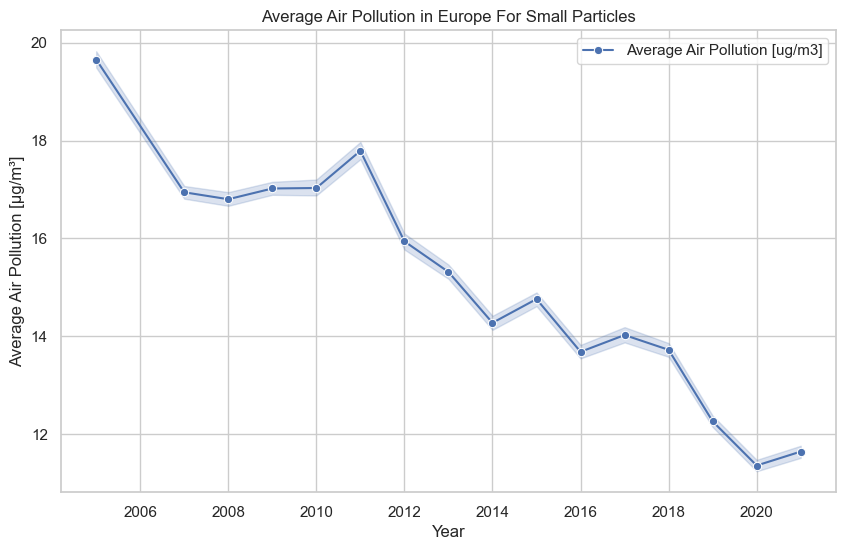

In [41]:
#graphe of air pollution through time  in EU
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot 'air_pollution_average_[ug/m3]' vs 'time' 
sns.lineplot(x='year', y='air_pollution_average_[ug/m3]', data=df_cleanedgpw3, label='Average Air Pollution [ug/m3]', marker='o')




# Add titles and labels
plt.title('Average Air Pollution in Europe For Small Particles')
plt.xlabel('Year')
plt.ylabel('Average Air Pollution [µg/m³]')
plt.legend()
plt.grid(True)

# Display the plot
# file_path = pathpics + '\\Average_Air_Pollution_in_Europe_For_Small_Particles_Per_Year.jpg'     
# plt.savefig(file_path, format='jpeg', dpi=300)
plt.show()

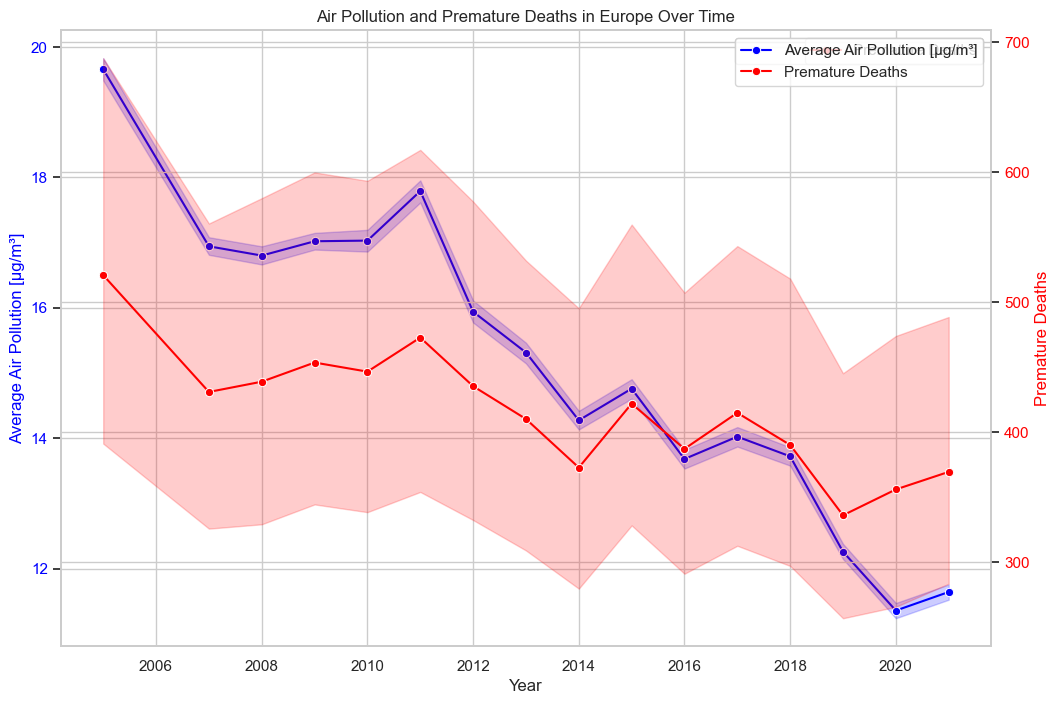

NameError: name 'pathpics' is not defined

In [42]:
#graphe of air pollution through time and premature death in EU

sns.set(style="whitegrid")

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot 'air_pollution_average_[ug/m3]' vs 'year' on ax1
sns.lineplot(x='year', y='air_pollution_average_[ug/m3]', data=df_cleanedgpw3, ax=ax1, label='Average Air Pollution [µg/m³]', color='blue', marker='o')

# Set label for the first y-axis
ax1.set_ylabel('Average Air Pollution [µg/m³]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis sharing the x-axis with ax1
ax2 = ax1.twinx()

# Plot 'premature_deaths' vs 'year' on ax2
sns.lineplot(x='year', y='premature_deaths', data=df_cleanedgpw3, ax=ax2, label='Premature Deaths', color='red', marker='o')

# Set label for the second y-axis
ax2.set_ylabel('Premature Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and labels
plt.title('Air Pollution and Premature Deaths in Europe Over Time')
ax1.set_xlabel('Year')

# Add legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Display the plot
plt.grid(True)
plt.show()

# Save the plot as a JPEG file
file_path = pathpics + '\\air_pollution_vs_premature_deaths.jpg'     
fig.savefig(file_path, format='jpeg', dpi=300)

In [51]:
# Step 1: Filter the DataFrame for the year 2021
df_2021 = df_cleanedgpw3[df_cleanedgpw3['year'] == 2021]

# Step 2: Sort the DataFrame by 'total_city_population_*' in descending order
df_sorted = df_2021.sort_values(by='total_city_population_*', ascending=False)

# Step 3: Drop rows where the 'city' value is 'All Urban Centres in EU27' or 'All Urban Centres in a Country'
cities_to_exclude = ['All Urban Centres in EU27', 'All Urban Centres in a Country']
df_sorted_filtered = df_sorted[~df_sorted['city'].isin(cities_to_exclude)]

# Step 4: Drop rows where 'city_boundary_specification_(lau/grid)' is not 'ESTAT Urban Audit Cities (LAU)'
df_final_filtered = df_sorted_filtered[df_sorted_filtered['city_boundary_specification_(lau/grid)'] == 'ESTAT Urban Audit Cities (LAU)']

# Step 5: Drop duplicates to ensure unique maximum values
df_unique = df_final_filtered.drop_duplicates(subset='total_city_population_*')

# Step 6: Create 3 tables per scenario
#df_scenario2005 = df_unique[df_unique['health_risk_scenario'] == 'WHO_2005_HRAPIE_Scen_Base'].reset_index(drop=True).head(10)
#df_scenario2021_base = df_unique[df_unique['health_risk_scenario'] == 'WHO_2021_AQG_Scen_Sensitivity_2'].reset_index(drop=True).head(10)
#df_scenario2021_sensitivity = df_unique[df_unique['health_risk_scenario'] == 'WHO_2021_AQG_Scen_Sensitivity_2'].reset_index(drop=True).head(10)

df_scenario2005 = df_unique[df_unique['health_risk_scenario'] == 'WHO_2005_HRAPIE_Scen_Base'].reset_index(drop=True).iloc[:10]
df_scenario2021_base = df_unique[df_unique['health_risk_scenario'] == 'WHO_2021_AQG_Scen_Sensitivity_2'].reset_index(drop=True).iloc[:10]
df_scenario2021_sensitivity = df_unique[df_unique['health_risk_scenario'] == 'WHO_2021_AQG_Scen_Sensitivity_2'].reset_index(drop=True).iloc[:10]

# Step 7: Keep only the columns you want to retain
columns_to_keep = ['city', 'total_city_population_*', 'air_pollution_average_[ug/m3]', 'premature_deaths', 'years_of_life_lost', 'density']
df_scenario2005_bis = df_scenario2005[columns_to_keep].copy()
df_scenario2021_base_bis = df_scenario2021_base[columns_to_keep].copy()
df_scenario2021_sensitivity_bis = df_scenario2021_sensitivity[columns_to_keep].copy()

# Step 8: Add a 'source' column to each DataFrame
df_scenario2005_bis.loc[:, 'source'] = 'df_scenario2005_bis'
df_scenario2021_base_bis.loc[:, 'source'] = 'df_scenario2021_base_bis'
df_scenario2021_sensitivity_bis.loc[:, 'source'] = 'df_scenario2021_sensitivity_bis'

# Create a common dataset
df_top10_bis = pd.concat([df_scenario2005_bis, df_scenario2021_base_bis, df_scenario2021_sensitivity_bis], ignore_index=True)

In [52]:
print("List of the 10 largest cities in Europe:")
print(list(df_scenario2005_bis['city']))
print(list(df_scenario2021_base_bis['city']))
print(list(df_scenario2021_sensitivity_bis['city']))

List of the 10 largest cities in Europe:
['Madrid', 'Berlin', 'København', 'Górnoslaski Zwiazek Metropolitalny', 'Lisboa (greater city)', 'Bucuresti', 'Hamburg', 'Wien', 'Budapest', 'Valencia']
['Barcelona', 'Milano (greater city)', 'Athina', 'Madrid', 'Napoli (greater city)', 'Roma', 'München', 'Bruxelles / Brussel', 'Sofia', 'Napoli']
['Barcelona', 'Milano (greater city)', 'Athina', 'Madrid', 'Napoli (greater city)', 'Roma', 'München', 'Bruxelles / Brussel', 'Sofia', 'Napoli']


In [53]:
basic_stats_2005 = df_scenario2005_bis.describe(include='all')
basic_stats_2021_base = df_scenario2021_base_bis.describe(include='all')
basic_stats_2021_sensitivity = df_scenario2021_sensitivity_bis.describe(include='all')

print("Basic Statistics for scenario 2005:")
print(basic_stats_2005)
print("\nBasic Statistics for scenario 2021 base:")
print(basic_stats_2021_base)
print("\nBasic Statistics for scenario 2021 sensitivity:")
print(basic_stats_2021_sensitivity)

Basic Statistics for scenario 2005:
          city  total_city_population_*  air_pollution_average_[ug/m3]  \
count       10             1.000000e+01                      10.000000   
unique      10                      NaN                            NaN   
top     Madrid                      NaN                            NaN   
freq         1                      NaN                            NaN   
mean       NaN             2.456775e+06                      12.320000   
std        NaN             1.146586e+06                       5.169956   
min        NaN             1.471901e+06                       7.500000   
25%        NaN             1.847430e+06                       9.400000   
50%        NaN             1.921430e+06                      10.200000   
75%        NaN             2.896926e+06                      14.350000   
max        NaN             5.143538e+06                      24.300000   

        premature_deaths  years_of_life_lost      density               sou

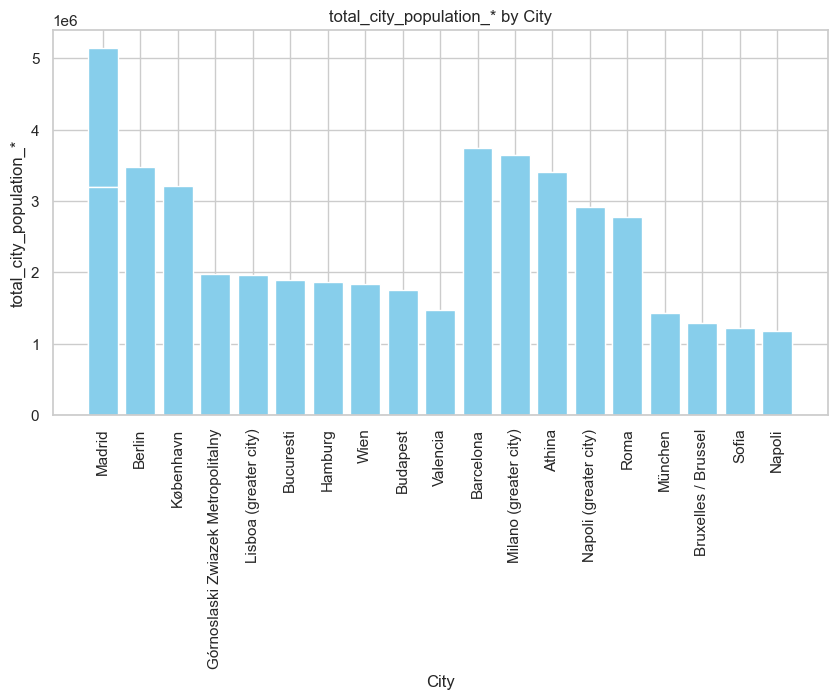

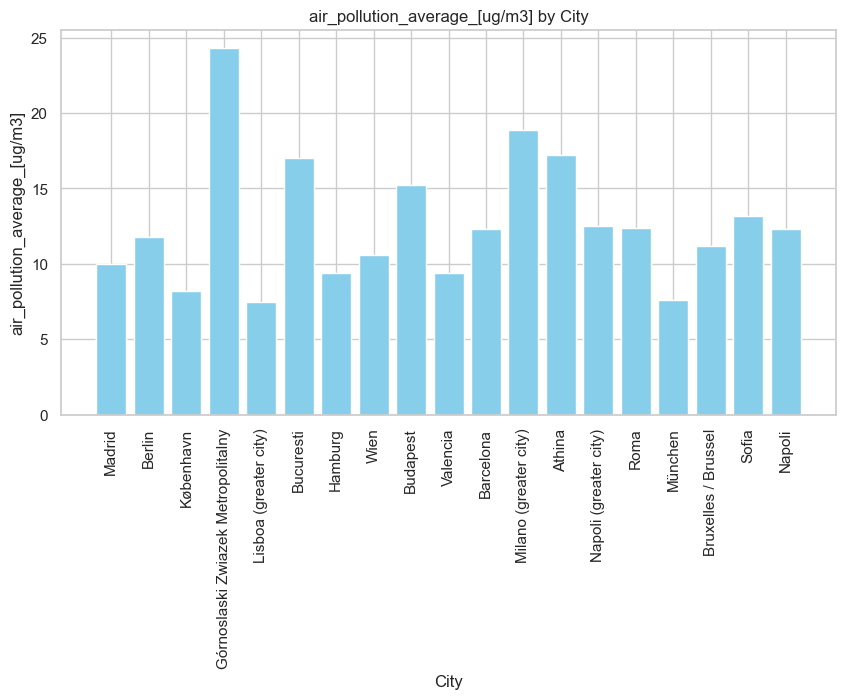

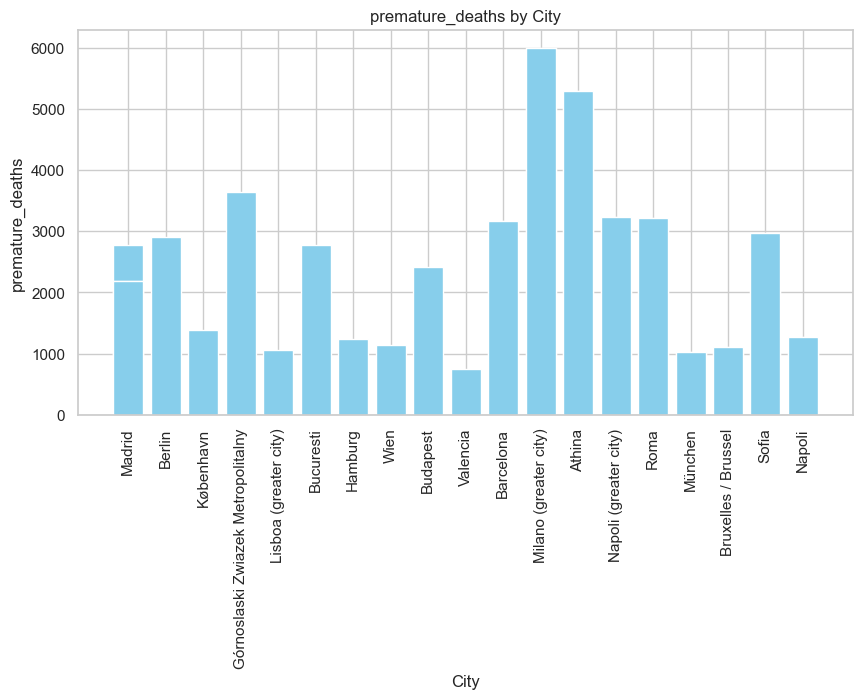

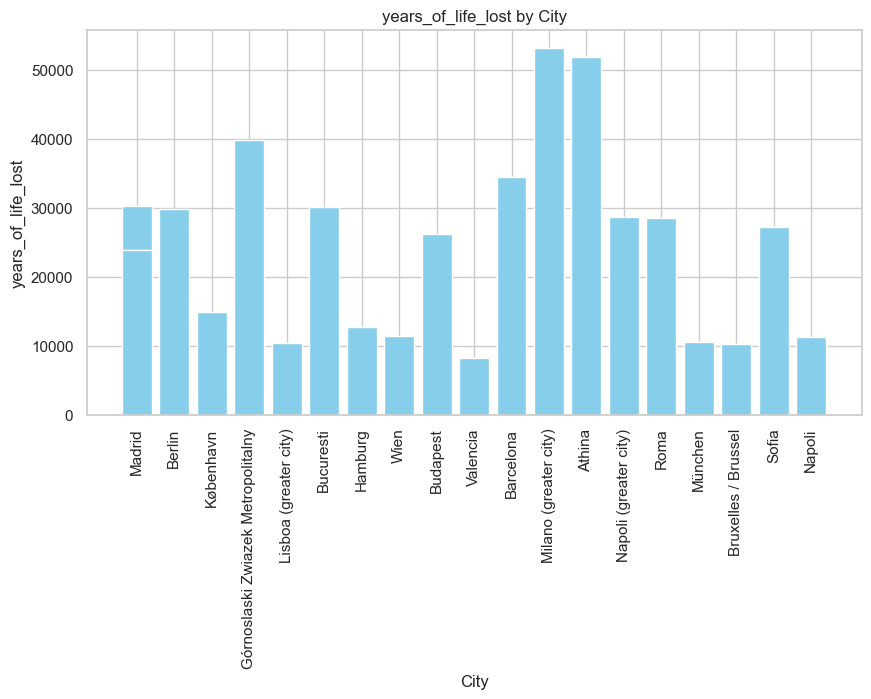

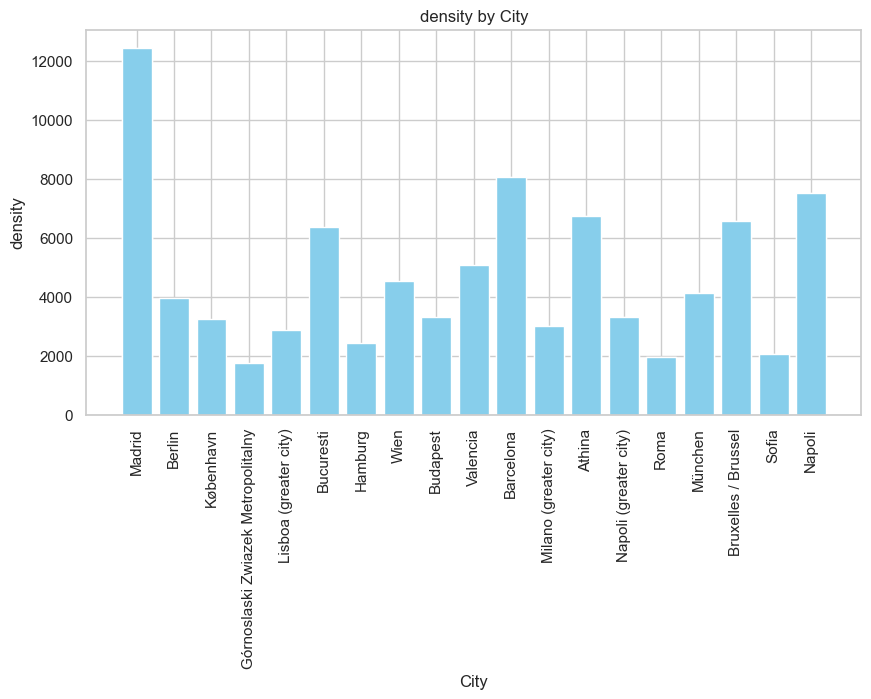

In [54]:
columns_to_plot = ['total_city_population_*', 'air_pollution_average_[ug/m3]', 'premature_deaths', 'years_of_life_lost', 'density']

for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.bar(df_top10['city'], df_top10_bis[column], color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f'{column} by City')
    plt.xlabel('City')
    plt.ylabel(column)
    plt.show()
# Set the x-axis labels to smaller font size
   # plt.xticks(ticks=range(len(df_scenario2021_sensitivity_bis['city'])), labels=[city.lower() for city in df_scenario2021_sensitivity_bis['city']], fontsize=10)


In [55]:
df = df_cleanedgpw3

In [57]:
#Creation graphs for Large and Small city comparisons
df_small_dense = df[(df['total_city_population_*'] <= 250000) & (df['density'] >= 3000)]
df_small_nondense = df[(df['total_city_population_*'] <= 250000) & (df['density'] <= 3000)]
df_large_dense = df[(df['total_city_population_*'] >= 1000000) & (df['density'] >= 3000)]
df_large_nondense = df[(df['total_city_population_*'] >= 1000000) & (df['density'] <= 3000)]
df_small_dense_pmd = df[(df['total_city_population_*'] <= 250000) & (df['density'] >= 3000)]
df_small_nondense_pmd = df[(df['total_city_population_*'] <= 250000) & (df['density'] <= 3000)]
df_large_dense_pmd = df[(df['total_city_population_*'] >= 1000000) & (df['density'] >= 3000)]
df_large_nondense_pmd = df[(df['total_city_population_*'] >= 1000000) & (df['density'] <= 3000)]

In [58]:
# air pollution
df_small_dense.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean().reset_index()
df_small_nondense.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean().reset_index()
df_large_dense.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean().reset_index()
df_large_nondense.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean().reset_index()
# premature deaths
df_small_dense_pmd.groupby('year')['premature_deaths'].mean().reset_index()
df_small_nondense_pmd.groupby('year')['premature_deaths'].mean().reset_index()
df_large_dense_pmd.groupby('year')['premature_deaths'].mean().reset_index()
df_large_nondense_pmd.groupby('year')['premature_deaths'].mean().reset_index()

,year,premature_deaths
0,2005,2533.394737
1,2007,2082.487179
2,2008,2133.282051
3,2009,2007.523810
4,2010,1988.976190
5,2011,1880.333333
6,2012,1645.051282
7,2013,1581.128205
8,2014,1486.102564
9,2015,1554.358974


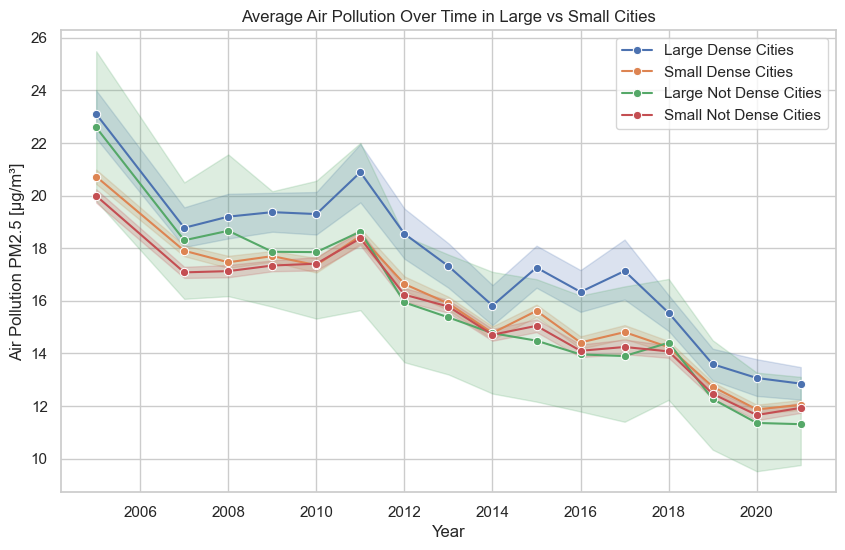

In [59]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='year', y='air_pollution_population_weighted_average_[ug/m3]', data=df_large_dense, marker='o', label='Large Dense Cities')
sns.lineplot(x='year', y='air_pollution_population_weighted_average_[ug/m3]', data=df_small_dense, marker='o', label='Small Dense Cities')
sns.lineplot(x='year', y='air_pollution_population_weighted_average_[ug/m3]', data=df_large_nondense, marker='o', label='Large Not Dense Cities')
sns.lineplot(x='year', y='air_pollution_population_weighted_average_[ug/m3]', data=df_small_nondense, marker='o', label='Small Not Dense Cities')

plt.title('Average Air Pollution Over Time in Large vs Small Cities')
plt.xlabel('Year')
plt.ylabel('Air Pollution PM2.5 [µg/m³]')
plt.grid(True)
plt.legend()
# plt.savefig('average air pollution over time large vs small.jpeg', format='jpeg', dpi=300)
plt.show()

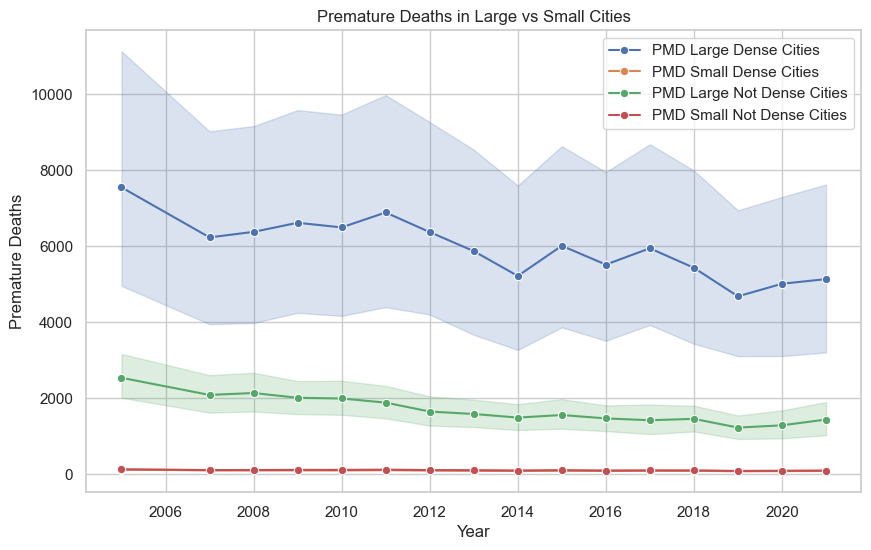

In [60]:
#Premature deaths in larger and smaller populated areas
#observation: density doesn't seem to have as much as an impact on premature death as suspected, rather the city size.

plt.figure(figsize=(10, 6))

sns.lineplot(x='year', y='premature_deaths', data=df_large_dense_pmd, marker='o', label='PMD Large Dense Cities')
sns.lineplot(x='year', y='premature_deaths', data=df_small_dense_pmd, marker='o', label='PMD Small Dense Cities')
sns.lineplot(x='year', y='premature_deaths', data=df_large_nondense_pmd, marker='o', label='PMD Large Not Dense Cities')
sns.lineplot(x='year', y='premature_deaths', data=df_small_nondense_pmd, marker='o', label='PMD Small Not Dense Cities')

plt.title('Premature Deaths in Large vs Small Cities')
plt.xlabel('Year')
plt.ylabel('Premature Deaths')
plt.grid(True)
plt.legend()
# plt.savefig('premature death large vs small linear.jpeg', format='jpeg', dpi=300)
plt.show()

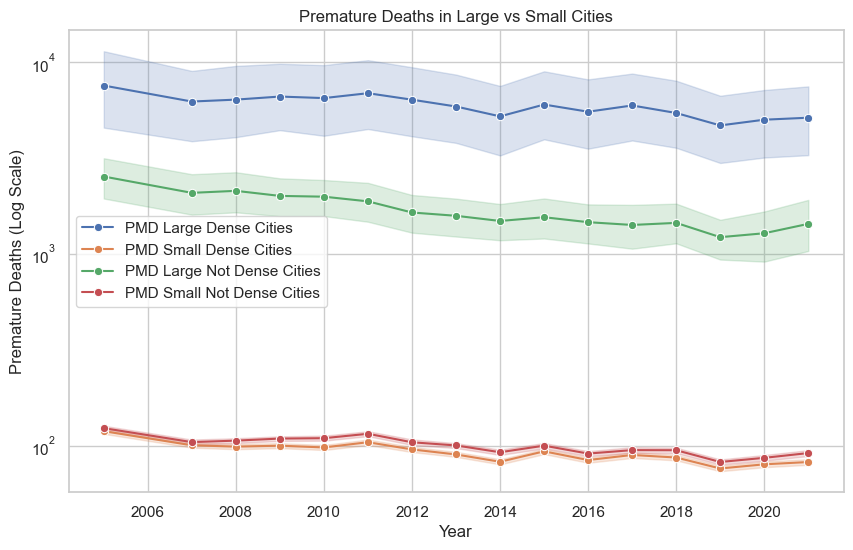

In [61]:
#Premature deaths in larger and smaller populated areas
#observation: density doesn't seem to have as much as an impact on premature death as suspected, rather the city size.

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Plotting the premature deaths data
sns.lineplot(x='year', y='premature_deaths', data=df_large_dense_pmd, marker='o', label='PMD Large Dense Cities')
sns.lineplot(x='year', y='premature_deaths', data=df_small_dense_pmd, marker='o', label='PMD Small Dense Cities')
sns.lineplot(x='year', y='premature_deaths', data=df_large_nondense_pmd, marker='o', label='PMD Large Not Dense Cities')
sns.lineplot(x='year', y='premature_deaths', data=df_small_nondense_pmd, marker='o', label='PMD Small Not Dense Cities')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add titles and labels
plt.title('Premature Deaths in Large vs Small Cities')
plt.xlabel('Year')
plt.ylabel('Premature Deaths (Log Scale)')

# Add grid and legend
plt.grid(True)
plt.legend()
# plt.savefig('premature death large vs small logarithmic.jpeg', format='jpeg', dpi=300)
# Display the plot
plt.show()

In [62]:
def fill_na_with_group_mean(group):
    return group.fillna(group.median())

df['premature_deaths'] = df.groupby(['city', 'year'])['premature_deaths'].transform(fill_na_with_group_mean)

df['premature_deaths']

0        2532.0
1        3025.0
2        7927.0
3         460.0
4        3330.0
          ...  
70171      46.0
70172      69.0
70173      72.0
70174      63.0
70175      91.0
Name: premature_deaths, Length: 70176, dtype: float64

In [63]:
!pip install plotly

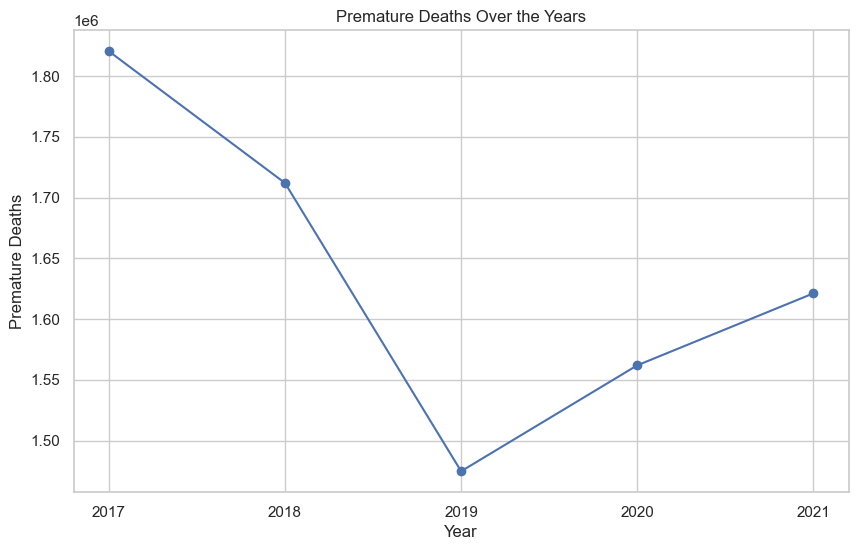

In [64]:
df['year'] = df['year'].astype(int)  

df_filtered = df[(df['year'] >= 2017) & (df['year'] <= 2021)]

df_grouped = df_filtered.groupby('year')['premature_deaths'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_grouped['year'], df_grouped['premature_deaths'], marker='o', linestyle='-', color='b')
plt.title('Premature Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Premature Deaths')
plt.grid(True)
plt.xticks(df_grouped['year'])
plt.show()

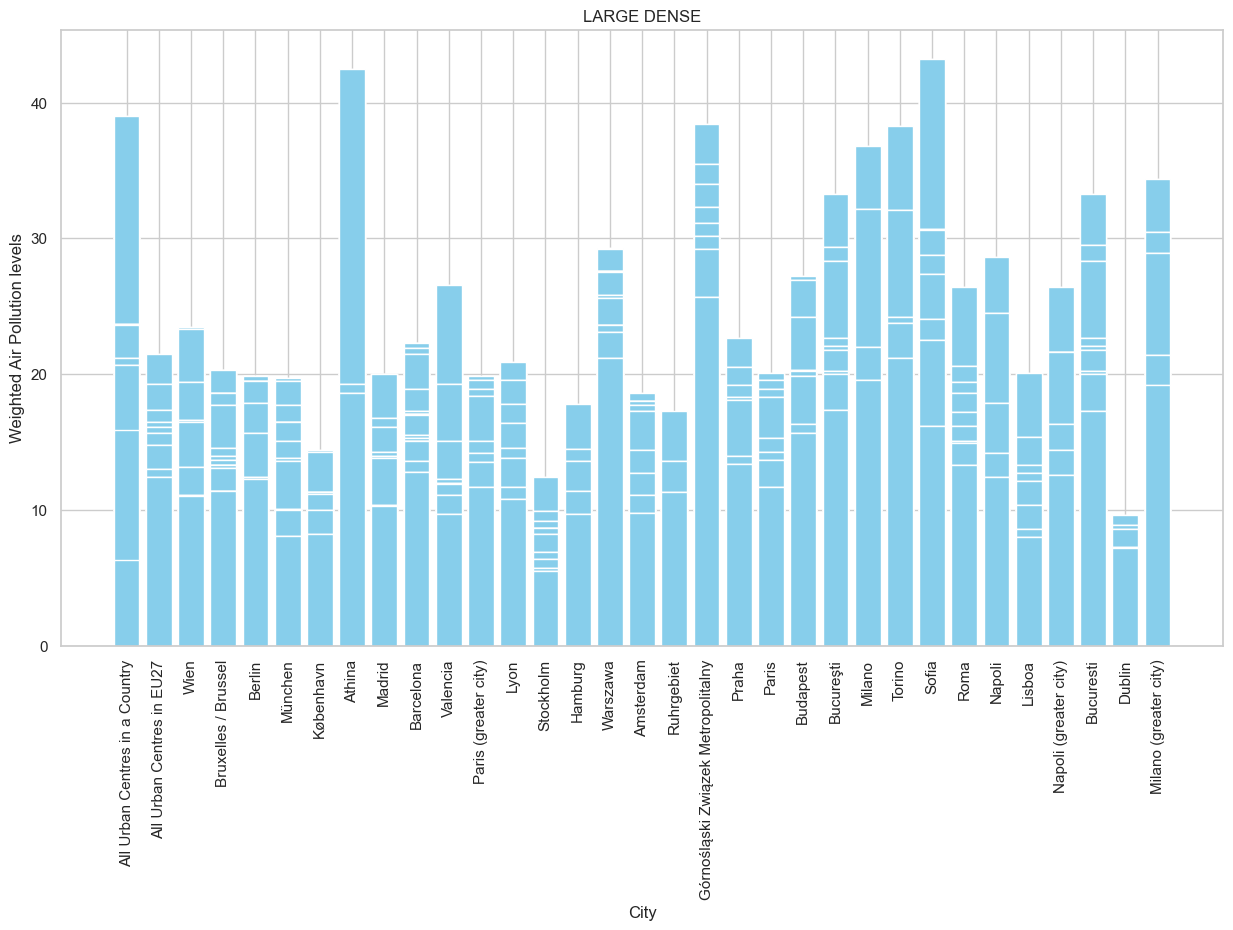

In [67]:
min_population = 1000000
min_density = 3000
max_population = 250000
max_density = 1000

large_cities = df[(df['total_city_population_*'] > min_population) & (df['density'] > min_density)]

plt.figure(figsize=(15, 8))
plt.bar(large_cities['city'], large_cities['air_pollution_population_weighted_average_[ug/m3]'], color='skyblue')

plt.xticks(rotation=90)

plt.title('LARGE DENSE')
plt.xlabel('City')
plt.ylabel('Weighted Air Pollution levels')

plt.show()

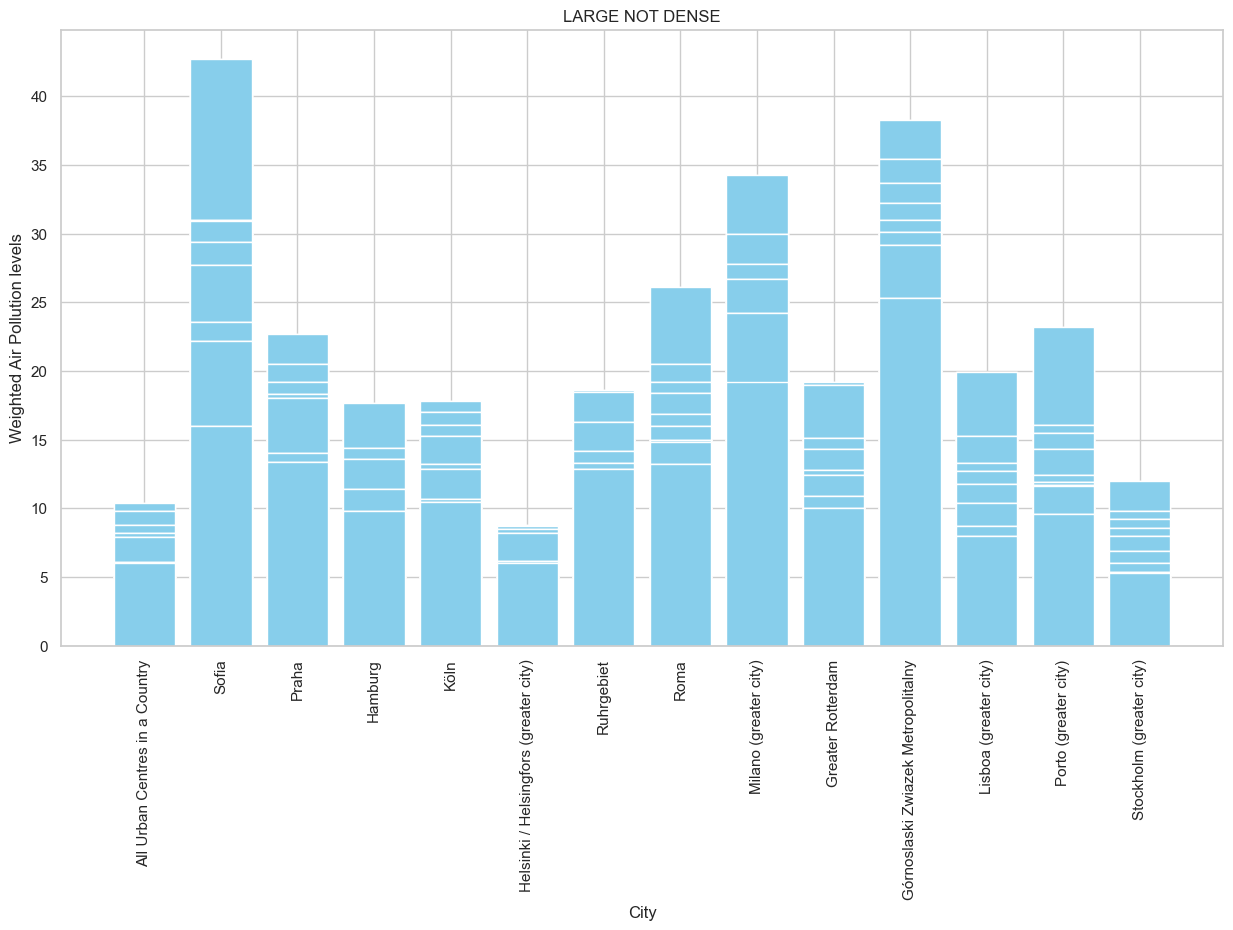

In [68]:
min_population = 1000000
min_density = 3000
max_population = 250000
max_density = 1000

large_cities = df[(df['total_city_population_*'] > min_population) & (df['density'] < min_density)]

plt.figure(figsize=(15, 8))
plt.bar(large_cities['city'], large_cities['air_pollution_population_weighted_average_[ug/m3]'], color='skyblue')

plt.xticks(rotation=90)

plt.title('LARGE NOT DENSE')
plt.xlabel('City')
plt.ylabel('Weighted Air Pollution levels')

plt.show()

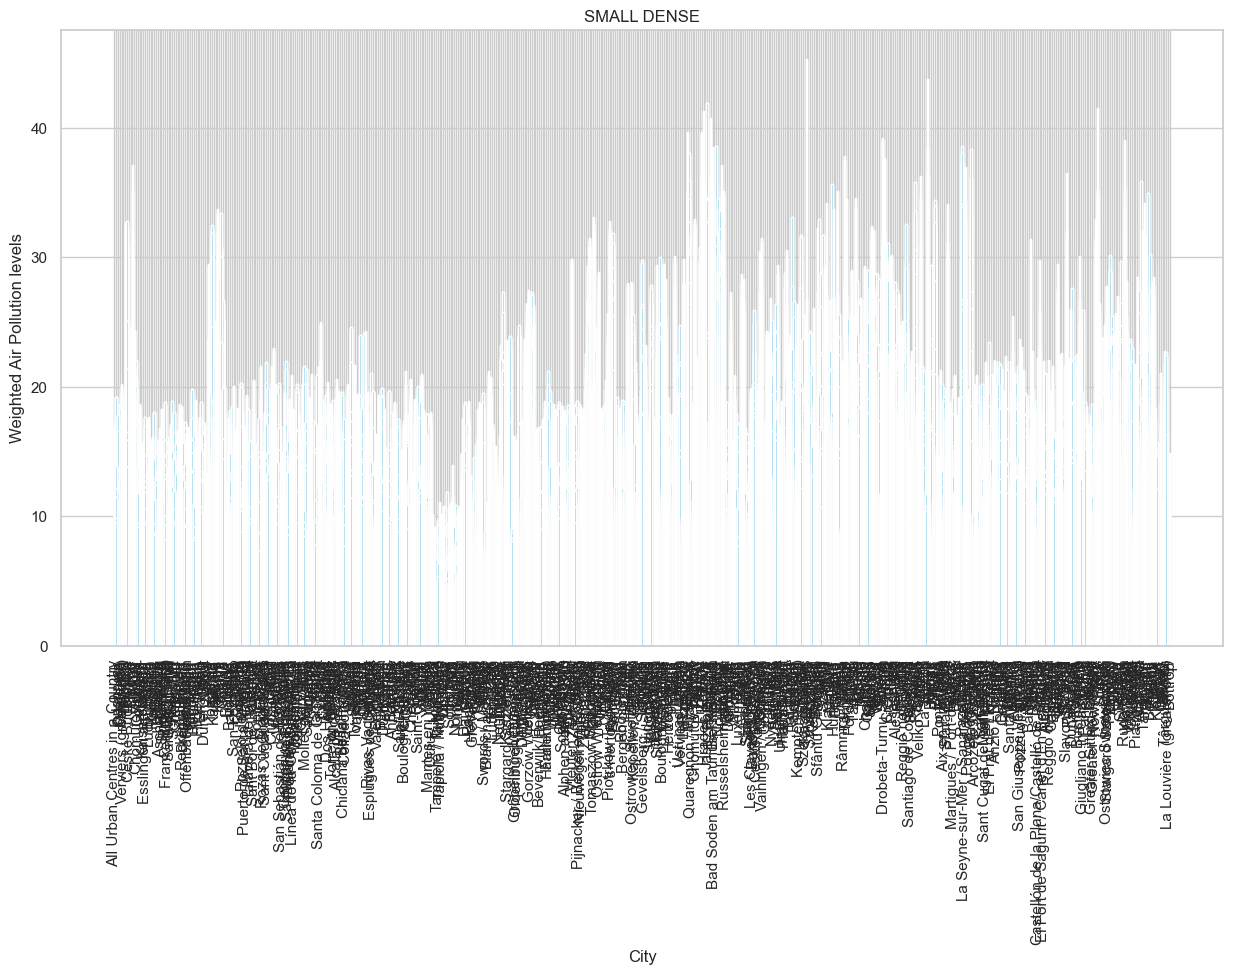

In [69]:
min_population = 1000000
min_density = 3000
max_population = 150000
max_density = 1000

small_cities = df[(df['total_city_population_*'] < max_population) & (df['density'] > max_density)]

plt.figure(figsize=(15, 8))
plt.bar(small_cities['city'], small_cities['air_pollution_population_weighted_average_[ug/m3]'], color='skyblue')

plt.xticks(rotation=90)

plt.title('SMALL DENSE')
plt.xlabel('City')
plt.ylabel('Weighted Air Pollution levels')

plt.show()

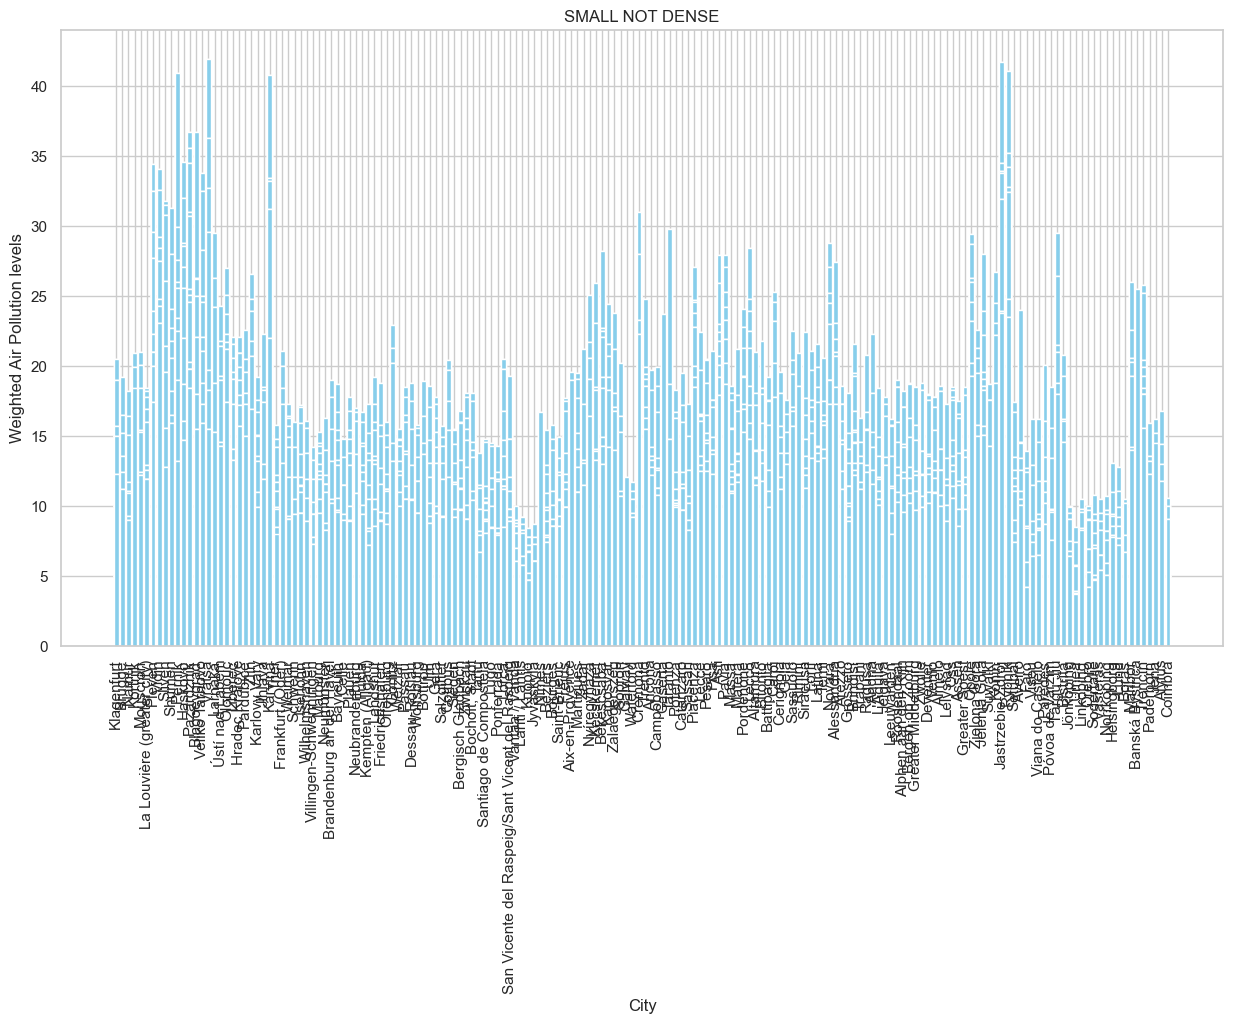

In [71]:
min_population = 1000000
min_density = 3000
max_population = 150000
max_density = 1000

small_cities = df[(df['total_city_population_*'] < max_population) & (df['density'] < max_density)]

plt.figure(figsize=(15, 8))
plt.bar(small_cities['city'], small_cities['air_pollution_population_weighted_average_[ug/m3]'], color='skyblue')

plt.xticks(rotation=90)

plt.title('SMALL NOT DENSE')
plt.xlabel('City')
plt.ylabel('Weighted Air Pollution levels')

plt.show()

In [72]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create the map
fig, ax = plt.subplots(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=35, urcrnrlat=65, llcrnrlon=-10, urcrnrlon=30, resolution='i')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to x and y coordinates for plotting
x, y = m(data['Longitude'], data['Latitude'])

# Plot the data using a scatter plot
sc = m.scatter(x, y, c=data['Population Density'], cmap='Reds', s=100, edgecolor='k', alpha=0.7)

# Add a colorbar
plt.colorbar(sc, label='Population Density (people per km²)')

plt.title('Population Density in European Cities')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)


# Plot the data using a scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(data['Longitude'], data['Latitude'], c=data['Population Density'],
                 cmap='Reds', s=[density / 10 for density in data['Population Density']],
                 edgecolor='k', alpha=0.7)

# Add a colorbar
plt.colorbar(sc, label='Population Density (people per km²)')

# Add labels
for i, city in enumerate(data['City']):
    plt.text(data['Longitude'][i], data['Latitude'][i], city, fontsize=12, ha='right')

plt.title('Population Density in European Cities (Simplified)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
# Plot the data using a scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Population Density'],
                 cmap='Reds', s=df['Population Density'] / 10,
                 edgecolor='k', alpha=0.7)

# Add a colorbar
plt.colorbar(sc, label='Population Density (people per km²)')

# Add labels for each city
for i, city in enumerate(df['City']):
    plt.text(df['Longitude'][i], df['Latitude'][i], city, fontsize=12, ha='right')

plt.title('Population Density in European Cities (Simplified)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'City': ['CityA', 'CityB', 'CityC', 'CityD'],
    'Latitude': [48.8566, 52.5200, 51.5074, 41.9028],
    'Longitude': [2.3522, 13.4050, -0.1278, 12.4964],
    'Population Density': [20500, 3800, 5600, 4500]  # Population density in people per km²
}

df = pd.DataFrame(data)

# Create a base map centered around Europe
m = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

# Create a list of [latitude, longitude, population_density] for the HeatMap
heat_data = [[row['Latitude'], row['Longitude'], row['Population Density']] for index, row in df.iterrows()]

# Add the heat map to the base map
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file or display it directly
m.save('europe_population_density_heatmap.html')
m

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
import folium
from folium.plugins import HeatMap

cities_to_exclude = ['All Urban Centres in a Country', 'All Urban Centres in EU27']
filtered_df = df[~df['city'].isin(cities_to_exclude)]

# Step 2: Filter cities with population greater than 500,000
filtered_df = df[df['total_city_population_*'] > 500000]
filtered_df.to_csv('filtered_cities.csv', index=False)

# Step 3: Geocode the filtered cities with a timeout
geolocator = Nominatim(user_agent="geoapiExercises")

def geocode_city(city_name):
    try:
        location = geolocator.geocode(city_name)
        return location.latitude, location.longitude
    except:
        return None, None

latitudes = []
longitudes = []
for city in filtered_df['city']:
    lat, lon = geocode_city(city)
    latitudes.append(lat)
    longitudes.append(lon)
    print(f"Geocoded {city}: {lat}, {lon}")  # Optional: Print progress
    time.sleep(1)  # Sleep for 1 second between requests to respect the rate limit

filtered_df['Latitude'] = latitudes
filtered_df['Longitude'] = longitudes

# Save the updated DataFrame with coordinates
filtered_df.to_csv('file_with_coordinates.csv', index=False)

# Step 4: Create the heatmap using Folium
m = folium.Map(location=[54.5260, 15.2551], zoom_start=4)
heat_data = [[row['Latitude'], row['Longitude'], row['population_density']] for index, row in filtered_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file or display it directly
m.save('europe_population_density_heatmap.html')
m

In [73]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
import folium
from folium.plugins import HeatMap

# Step 1: Exclude specific cities
cities_to_exclude = ['All Urban Centres in a Country', 'All Urban Centres in EU27']  # Replace with the cities you want to exclude
filtered_df = df[~df['city'].isin(cities_to_exclude)]

filtered_df = filtered_df.drop_duplicates(subset='city')

# Verify the exclusion
print("Cities remaining after exclusion:", filtered_df['city'].unique())

# Step 2: Filter cities with population greater than 500,000
filtered_df = filtered_df[filtered_df['total_city_population_*'] > 1000000]
filtered_df.to_csv('filtered_cities.csv', index=False)

# Step 3: Geocode the filtered cities
geolocator = Nominatim(user_agent="geoapiExercises")

def geocode_city(city_name):
    try:
        location = geolocator.geocode(city_name)
        return location.latitude, location.longitude
    except:
        return None, None

latitudes = []
longitudes = []
for city in filtered_df['city']:
    lat, lon = geocode_city(city)
    latitudes.append(lat)
    longitudes.append(lon)
    print(f"Geocoded {city}: {lat}, {lon}")  # Optional: Print progress
    time.sleep(1)  # Sleep for 1 second between requests to respect the rate limit

filtered_df['Latitude'] = latitudes
filtered_df['Longitude'] = longitudes

filtered_df = filtered_df.dropna(subset=['Latitude', 'Longitude'])

# Save the updated DataFrame with coordinates
filtered_df.to_csv('file_with_coordinates.csv', index=False)

# Step 4: Create the heatmap using Folium
m = folium.Map(location=[54.5260, 15.2551], zoom_start=4)
heat_data = [[row['Latitude'], row['Longitude'], row['density']] for index, row in filtered_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file or display it directly
m.save('europe_population_density_heatmap.html')
m

ModuleNotFoundError: No module named 'geopy'

In [74]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
import folium
from folium.plugins import HeatMap

# Step 1: Exclude specific cities
cities_to_exclude = ['All Urban Centres in a Country', 'All Urban Centres in EU27']  # Replace with the cities you want to exclude
filtered_df = df[~df['city'].isin(cities_to_exclude)]

filtered_df = filtered_df.drop_duplicates(subset='city')

# Verify the exclusion
print("Cities remaining after exclusion:", filtered_df['city'].unique())

# Step 2: Filter cities with population greater than 500,000
filtered_df = filtered_df[filtered_df['total_city_population_*'] > 1000000]
filtered_df.to_csv('filtered_cities.csv', index=False)

# Step 3: Geocode the filtered cities
geolocator = Nominatim(user_agent="geoapiExercises")

def geocode_city(city_name):
    try:
        location = geolocator.geocode(city_name)
        return location.latitude, location.longitude
    except:
        return None, None

latitudes = []
longitudes = []
for city in filtered_df['city']:
    lat, lon = geocode_city(city)
    latitudes.append(lat)
    longitudes.append(lon)
    print(f"Geocoded {city}: {lat}, {lon}")  # Optional: Print progress
    time.sleep(1)  # Sleep for 1 second between requests to respect the rate limit

filtered_df['Latitude'] = latitudes
filtered_df['Longitude'] = longitudes

filtered_df = filtered_df.dropna(subset=['Latitude', 'Longitude'])

#we Save the updated DataFrame with coordinates
filtered_df.to_csv('file_with_coordinates.csv', index=False)

# Step 4: Create the heatmap using Folium
m = folium.Map(location=[54.5260, 15.2551], zoom_start=4)
heat_data = [[row['Latitude'], row['Longitude'], row['air_pollution_population_weighted_average_[ug/m3']] for index, row in filtered_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file or display it directly
m.save('europe_population_density_heatmap.html')
m

ModuleNotFoundError: No module named 'geopy'

In [82]:
df = pd.read_csv("/Users/maurits/Documents/Ironhack/week_03/GPW3/ironhack_gpw3/data/combined_dataset_allyears.csv")
df.head(10)

,City Boundary Specification (LAU/grid),Country Or Territory,City,City Code,Total City Population *,Year,Air Pollutant,Health Risk Scenario,Populated Area [km2],Air Pollution Average [ug/m3],Air Pollution Population Weighted Average [ug/m3],Premature Deaths,Premature Deaths - lower CI,Premature Deaths - upper CI,Years Of Life Lost,Years Of Life Lost - lower CI,Years Of Life Lost - upper CI
0,Urban Centres (grid),Austria,All Urban Centres in a Country,NaN,2405646,2005,NO2,WHO_2005_HRAPIE_Scen_Base,446,30.3,32.8,1352.0,783.0,1911.0,14704.0,8522.0,20791.0
1,Urban Centres (grid),Belgium,All Urban Centres in a Country,NaN,3030639,2005,NO2,WHO_2005_HRAPIE_Scen_Base,745,32.4,35.1,2141.0,1247.0,3017.0,22939.0,13338.0,32327.0
2,Urban Centres (grid),Bulgaria,All Urban Centres in a Country,NaN,3010927,2005,NO2,WHO_2005_HRAPIE_Scen_Base,384,23.3,24.9,1236.0,712.0,1759.0,13367.0,7713.0,18982.0
3,Urban Centres (grid),Cyprus,All Urban Centres in a Country,NaN,418267,2005,NO2,WHO_2005_HRAPIE_Scen_Base,131,20.3,21.0,24.0,13.0,34.0,249.0,143.0,357.0
4,Urban Centres (grid),Czechia,All Urban Centres in a Country,NaN,2464143,2005,NO2,WHO_2005_HRAPIE_Scen_Base,536,26.4,27.6,961.0,554.0,1364.0,10585.0,6105.0,15045.0
5,Urban Centres (grid),Germany,All Urban Centres in a Country,NaN,25479567,2005,NO2,WHO_2005_HRAPIE_Scen_Base,6769,29.2,30.7,13555.0,7850.0,19178.0,152916.0,88550.0,216447.0
6,Urban Centres (grid),Denmark,All Urban Centres in a Country,NaN,1490619,2005,NO2,WHO_2005_HRAPIE_Scen_Base,400,22.5,24.1,341.0,197.0,487.0,3757.0,2159.0,5354.0
7,Urban Centres (grid),Estonia,All Urban Centres in a Country,NaN,522560,2005,NO2,WHO_2005_HRAPIE_Scen_Base,103,16.4,17.4,5.0,3.0,7.0,54.0,31.0,78.0
8,Urban Centres (grid),Spain,All Urban Centres in a Country,NaN,21279144,2005,NO2,WHO_2005_HRAPIE_Scen_Base,2439,29.8,34.3,13055.0,7618.0,18337.0,143218.0,83571.0,201141.0
9,Urban Centres (grid),European Union Countries,All Urban Centres in EU27,NaN,145177261,2005,NO2,WHO_2005_HRAPIE_Scen_Base,29537,29.3,32.1,81424.0,47430.0,114554.0,907395.0,528454.0,1276934.0


In [86]:
large_pop_df = df[(df.total_city_population >= 1000000) & (df.density >= 3000)]
large_pop_df.head()

AttributeError: 'DataFrame' object has no attribute 'total_city_population'

In [87]:
average_pollution_per_year_large_pop = large_pop_df.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean()

print(average_pollution_per_year_large_pop)

NameError: name 'large_pop_df' is not defined

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

average_pollution_per_year = large_pop_df.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='air_pollution_population_weighted_average_[ug/m3]', data=average_pollution_per_year, marker='o')

plt.title('Average Weighted Air Pollution Over Time in large Populated cities')
plt.xlabel('Year')
plt.ylabel('Air Pollution [µg/m³]')
plt.grid(True)

plt.savefig('average weighted air pollution large pop.jpeg', format='jpeg', dpi=300)

plt.show()

NameError: name 'large_pop_df' is not defined

In [ ]:
small_pop_df = df[(df.total_city_population <= 250000) & (df.density >= 3000)]
small_pop_df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

average_pollution_per_year = small_pop_df.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='air_pollution_population_weighted_average_[ug/m3]', data=average_pollution_per_year, marker='o')

plt.title('Average Weighted Air Pollution Over Time in Small Populated cities')
plt.xlabel('Year')
plt.ylabel('Air Pollution [µg/m³]')
plt.grid(True)

plt.savefig('average weighted air pollution small pop.jpeg', format='jpeg', dpi=300)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

average_pollution_per_year_small_pop = small_pop_df.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean().reset_index()

average_pollution_per_year_large_pop = large_pop_df.groupby('year')['air_pollution_population_weighted_average_[ug/m3]'].mean().reset_index()

plt.figure(figsize=(10, 6)) 

sns.lineplot(x='year', y='air_pollution_population_weighted_average_[ug/m3]', data=average_pollution_per_year_large_pop, marker='o', label='Large Cities')

sns.lineplot(x='year', y='air_pollution_population_weighted_average_[ug/m3]', data=average_pollution_per_year_small_pop, marker='o', label='Small Cities')

plt.title('Average Air Pollution Over Time in Large vs Small Cities')
plt.xlabel('Year')
plt.ylabel('Air Pollution [µg/m³]')
plt.grid(True)
plt.legend()  


plt.show()


In [ ]:
df.reset_index().pivot_table(index= "country_or_territory", columns="year", values="years_of_life_lost")

In [ ]:
df.reset_index().pivot_table(index= "country_or_territory", columns="year", values="premature_deaths")

In [ ]:
def get_premature_deaths_by_country_and_year(df):
   
    country = input("Enter name of country or territory ")
    year = input("Enter a year: ")

    if country not in df['country_or_territory'].values:
        print(f"Error: this country of territory '{country}' is not in data.")
        return 
        
    if year not in df['year'].astype(str).values:
           print(f"Error: this year '{year}' is not in data.")
           return
    
    filtered_df = df[(df['country_or_territory'] == country) & (df['year'] == int(year))]
    
    
    if not filtered_df.empty:
        total_deaths = filtered_df['premature_deaths'].sum()
        print(f"The total of premature deaths in {year} and in {country} is {total_deaths}.")
    else:
        print(f"No data availabe for {country} in {year}.")
        
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_df['country_or_territory'], filtered_df['premature_deaths'], color='skyblue')
    plt.xlabel('Country or Territory')
    plt.ylabel('Number of Premature Deaths')
    plt.title(f'Premature Deaths in {country} for the year {year}')
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()

get_premature_deaths_by_country_and_year(df)


In [ ]:
def get_years_of_life_lost_by_country_and_year(df):
   
    country = input("Enter name of country or territory ")
    year = input("Enter a year: ")

    if country not in df['country_or_territory'].values:
        print(f"Error: this country of territory '{country}' is not in data.")
        return 
        
    if year not in df['year'].astype(str).values:
           print(f"Error: this year '{year}' is not in data.")
           return
    
    filtered_df = df[(df['country_or_territory'] == country) & (df['year'] == int(year))]
    
    
    if not filtered_df.empty:
        total_years_of_life_lost = filtered_df['years_of_life_lost'].sum()
        print(f"The total of years of life lost in {year} and in {country} is '{total_years_of_life_lost}'.")
    else:
        print(f"No data availabe for {country} in {year}.")
get_years_of_life_lost_by_country_and_year(df)

In [ ]:
def get_air_pollution_population_weighted_by_city_and_year(df):
   
    city = input("Enter name of a city")
    year = input("Enter a year: ")

    if city not in df['city'].values:
        print(f"Error: The city '{city}' is not in data.")
        return 
        
    if year not in df['year'].astype(str).values:
           print(f"Error: this year '{year}' is not in data.")
           return
    
    filtered_df = df[(df['city'] == city ) & (df['year'] == int(year))]
    
    
    if not filtered_df.empty:
        average_air_pollution_population_weighted = filtered_df['air_pollution_population_weighted_average_[ug/m3]'].sum()
        print(f"In {city} in {year} the air pollution population weighted average was'{average_air_pollution_population_weighted}'.")
    else:
        print(f"No data availabe for {country} in {year}.")

get_air_pollution_population_weighted_by_city_and_year(df)